###Aprendizado de máquina não supervisionado para problemas de Clusterização

K-médias é um algoritmo não supervisionado Isto é seus dados não possuem rótulos. O principal propósito é identificar as similaridades entre os dados e agrupalos conforme o número de cluster. O algoritmo de k-médias é interativo e poderoso para dividir um conjunto de dados em grupos separados. Uma característica importante dessa técnica é o fato de que o K deve ser predeterminado.

In [ ]:
# importes de bibliotecas para análise e visualização de dados
import  numpy            as np
import  pandas           as pd
import  seaborn          as sb

In [ ]:
iris = sb.load_dataset("iris") #carrega o conjunto de dados iris flores

######DICIONÁRIO DE DADOS :
sepal_length  - comprimento de sépala
sepal_width   - largura de sépala
petal_length  - comprimento de pétala
petal_width  - largura de pétala

In [ ]:
iris.head () # leitura dos dados

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# valores de distribuição por grupos de espécies 
iris["species"].value_counts ()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

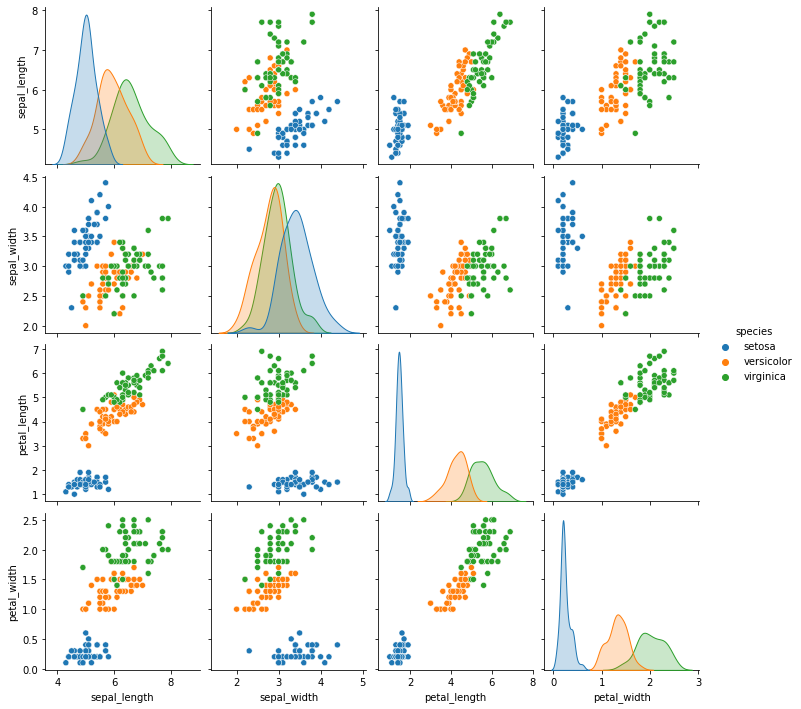

In [ ]:
sb.pairplot(iris,hue="species"); #gráfico de distribuição e dispersão dos dados

In [ ]:
X = np.array(iris.drop("species",axis=1)) # atribuição dos dados destaques a variável X , excluindo previamente a variável alvo

In [ ]:
# Carrega o pacote de Cluster do Scikit-lean - KMeans
from sklearn.cluster import KMeans

In [ ]:
# Instância do Modelo de aprendizado de máquina não supervisionado
# n_cluster == número de grupos iguais a 3 logo(virginica, setosa, versicolor)
kmeans = KMeans(n_clusters=3,random_state=0)

In [ ]:
 
# Treinamento do Modelo 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Criando nova coluna com os valores dos agrupamentos produzidos pelo Algoritmo 
iris["K-medias"] = kmeans.labels_

In [ ]:
iris.head ()

,sepal_length,sepal_width,petal_length,petal_width,species,K-medias
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


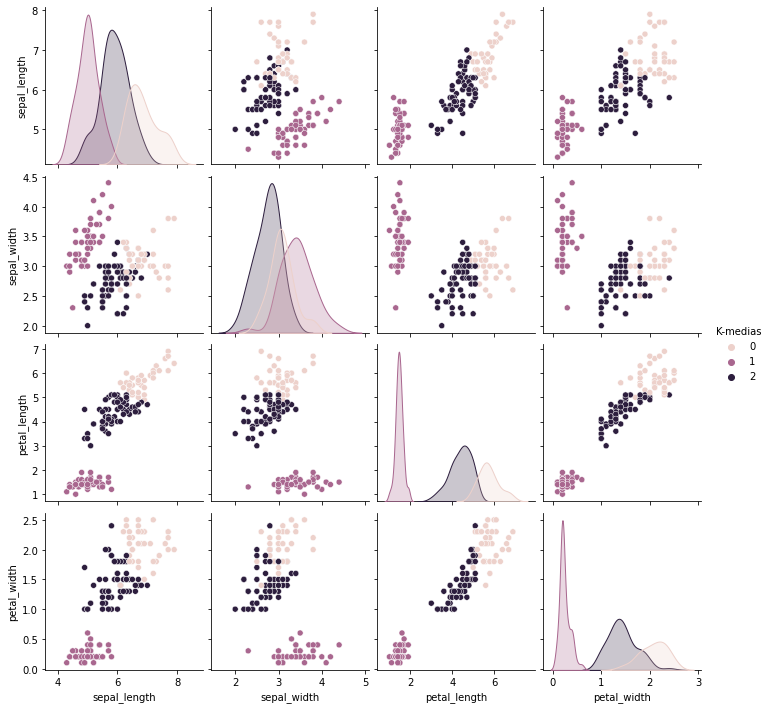

In [ ]:
#gráfico de distribuição e dispersão dos dados
sb.pairplot(iris,hue="K-medias");

In [ ]:
# pacote para visualização de dados
import matplotlib.pyplot as plt
plt.style.use ("ggplot")

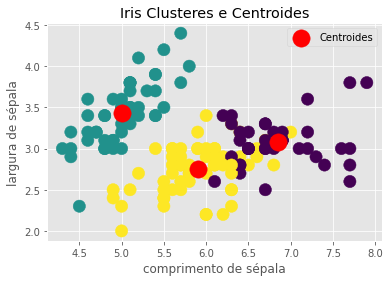

In [ ]:
# Análise visual dos agrupamentos produzidos pelo KMeans
plt.scatter(X[:, 0], X[:,1], s = 150, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroides')
plt.title('Iris Clusteres e Centroides')
plt.xlabel('comprimento de sépala')
plt.ylabel('largura de sépala')
plt.legend()
plt.show()